In [77]:
# Importing all neccessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import mobilenet
import sklearn.metrics

In [78]:
# Defining the path for the dataset
test_path = r'C:\Users\bhave\OneDrive\Desktop\American Sign Lan\asl_dataset\test'
train_path = r'C:\Users\bhave\OneDrive\Desktop\American Sign Lan\asl_dataset\train'
valid_path = r'C:\Users\bhave\OneDrive\Desktop\American Sign Lan\asl_dataset\val'

In [79]:
# Extracting X_train, y_train, X_test, y_test, X_valid, y_valid from the dataset
train_batches = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input, rescale=1./255).flow_from_directory(directory=train_path, target_size=(64,64), shuffle=True)
valid_batches = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input, rescale=1./255).flow_from_directory(directory=valid_path, target_size=(64,64), shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input, rescale=1./255).flow_from_directory(directory=test_path, target_size=(64,64), shuffle=False)

Found 1975 images belonging to 36 classes.
Found 360 images belonging to 36 classes.
Found 180 images belonging to 36 classes.


In [82]:
# Creating a MobileNet model with pre-trained weights (include_top=False loads the full model without the final classification layer)
mobile = mobilenet.MobileNet(include_top=False, input_shape=(64,64,3))

In [83]:
# Model Summary of MobileNet
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 32, 32, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 32, 32, 32)       128       
 ation)                                         

In [84]:
# Freezing the layers of the model
x = mobile.layers[-6].output

# Output is flattened and fully connected layers with dropout for regularization are added
x = Flatten()(x)
x = Dropout(0.25)(x)
output = Dense(units=36, activation='softmax')(x)

model = Model(inputs=mobile.input, outputs=output)


In [86]:
# Setting last few layers to be trainable
for layer in model.layers[:-30]:
    layer.trainable = False

In [87]:
# Model Summary after modifications
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 32, 32, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 32, 32, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 32, 32, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 32, 32, 32)       128       
 ation)                                                    

In [88]:
# Compiling the model with Adam optimizer, categorical crossentropy loss and accuracy as the metric
custom_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
# Training the model
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=30, batch_size=7, verbose=2)

Epoch 1/30
62/62 - 14s - loss: 2.0031 - accuracy: 0.4552 - val_loss: 6.1080 - val_accuracy: 0.0278 - 14s/epoch - 221ms/step
Epoch 2/30
62/62 - 12s - loss: 0.7046 - accuracy: 0.7792 - val_loss: 6.2645 - val_accuracy: 0.0278 - 12s/epoch - 187ms/step
Epoch 3/30
62/62 - 11s - loss: 0.4356 - accuracy: 0.8648 - val_loss: 5.3683 - val_accuracy: 0.0528 - 11s/epoch - 182ms/step
Epoch 4/30
62/62 - 12s - loss: 0.3418 - accuracy: 0.8896 - val_loss: 2.8644 - val_accuracy: 0.2111 - 12s/epoch - 193ms/step
Epoch 5/30
62/62 - 12s - loss: 0.2556 - accuracy: 0.9144 - val_loss: 1.6052 - val_accuracy: 0.5306 - 12s/epoch - 201ms/step
Epoch 6/30
62/62 - 12s - loss: 0.2176 - accuracy: 0.9332 - val_loss: 1.0259 - val_accuracy: 0.6833 - 12s/epoch - 195ms/step
Epoch 7/30
62/62 - 12s - loss: 0.1694 - accuracy: 0.9473 - val_loss: 0.4951 - val_accuracy: 0.8556 - 12s/epoch - 198ms/step
Epoch 8/30
62/62 - 12s - loss: 0.1552 - accuracy: 0.9519 - val_loss: 0.3244 - val_accuracy: 0.8917 - 12s/epoch - 197ms/step
Epoch 9/

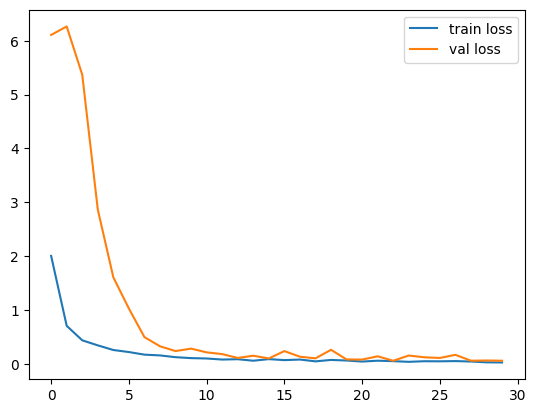

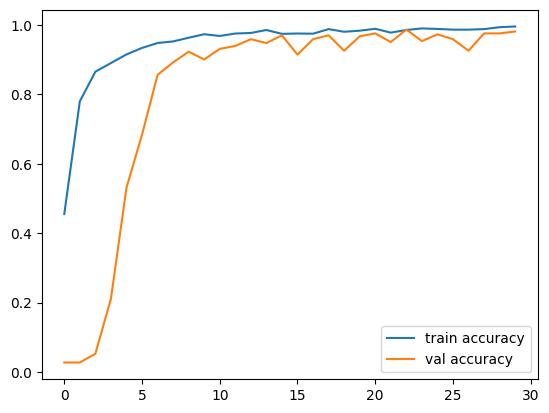

In [90]:
# Plot loss graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [92]:
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(test_batches,verbose=2)
print('\nTest accuracy:', test_acc)

6/6 - 1s - loss: 0.0939 - accuracy: 0.9611 - 627ms/epoch - 104ms/step

Test accuracy: 0.9611111283302307


In [91]:
# Predicting the labels for test data
test_labels = test_batches.classes
test_predictions = model.predict(x=test_batches, verbose=0)

In [93]:
# Using confusion matrix to evaluate the predictions
cm = sklearn.metrics.confusion_matrix(y_true = test_labels, y_pred = test_predictions.argmax(axis=1))
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
                  'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
                  'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

Confusion Matrix, without normalization
[[5 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 1]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]


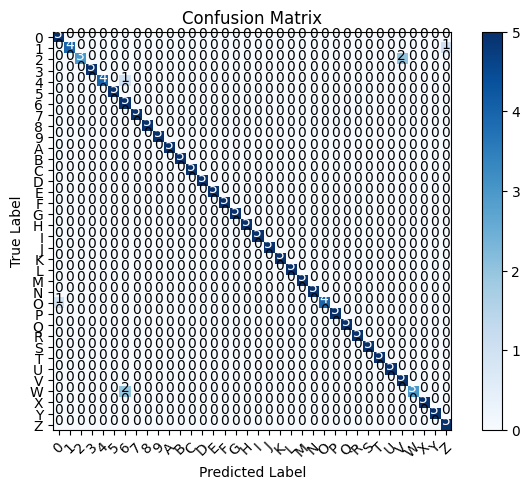

In [95]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    
    # Print the numbers inside the squares
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')